In [57]:
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [58]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [59]:
# Leer datos
data = pd.read_csv('/content/drive/MyDrive/SIS420 1.2024/Laboratorios/lab1/HomeC.csv', delimiter=',')

# Selecciona las columnas específicas para X y y
columnas_X = ['time', 'gen [kW]', 'House overall [kW]', 'Dishwasher [kW]', 'Furnace 1 [kW]', 'Furnace 2 [kW]', 'Home office [kW]', 'Fridge [kW]', 'Wine cellar [kW]']
columna_y = 'use [kW]'

# Extrae las características (X) y la variable objetivo (y)
X = data[columnas_X].values
y = data[columna_y].values
m = len(y)
print(m)

# imprimir algunos puntos de datos
print('{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}'.format('time', 'gen [kW]', 'House overall [kW]', 'Dishwasher [kW]', 'Furnace 1 [kW]', 'Furnace 2 [kW]', 'Home office [kW]', 'Fridge [kW]', 'Wine cellar [kW]', 'use [kW]'))
print('-' * 100)
for i in range(10):
    print('{:10.0f}{:10.2f}{:10.2f}{:10.2f}{:10.2f}{:10.2f}{:10.2f}{:10.2f}{:10.2f}{:10.2f}'.format(X[i, 0], X[i, 1], X[i, 2], X[i, 3], X[i, 4], X[i, 5], X[i, 6], X[i, 7], X[i, 8], y[i]))

<ipython-input-59-bd29ca9062d0>:2: DtypeWarning: Columns (0,27) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('/content/drive/MyDrive/SIS420 1.2024/Laboratorios/lab1/HomeC.csv', delimiter=',')


503911
      time  gen [kW]House overall [kW]Dishwasher [kW]Furnace 1 [kW]Furnace 2 [kW]Home office [kW]Fridge [kW]Wine cellar [kW]  use [kW]
----------------------------------------------------------------------------------------------------
1451624400      0.00      0.93      0.00      0.02      0.06      0.44      0.12      0.01      0.93
1451624401      0.00      0.93      0.00      0.02      0.06      0.44      0.12      0.01      0.93
1451624402      0.00      0.93      0.00      0.02      0.06      0.45      0.12      0.01      0.93
1451624403      0.00      1.02      0.00      0.11      0.07      0.45      0.12      0.01      1.02
1451624404      0.00      1.14      0.00      0.24      0.06      0.45      0.12      0.01      1.14
1451624405      0.00      1.39      0.00      0.50      0.06      0.45      0.12      0.01      1.39
1451624406      0.00      1.37      0.00      0.50      0.06      0.44      0.12      0.01      1.37
1451624407      0.00      1.43      0.00      0.48

In [60]:
X.shape

(503911, 9)

In [61]:
def normalizarCaracteristicas(X):
    X_norm = X.copy()
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])

    mu = np.mean(X, axis = 0)
    sigma = np.std(X, axis = 0)
    X_norm = (X - mu) / sigma

    return X_norm, mu, sigma

In [62]:
# llama featureNormalize con los datos cargados
#X_norm, mu, sigma = normalizarCaracteristicas(X)

#print(X)
#print('Media calculada:', mu)
#print('Desviación estandar calculada:', sigma)
#print(X_norm)

# Seleccionar solo las columnas numéricas
columnas_numericas = data.select_dtypes(include=[np.number]).columns.tolist()

# Seleccionar las columnas específicas para X y y
columnas_X = columnas_numericas[:-1]  # Todas las columnas numéricas excepto la última
columna_y = columnas_numericas[-1]    # Última columna numérica

# Extraer las características (X) y la variable objetivo (y)
# Llenar los valores faltantes o no numéricos con la media de cada columna
data_filled = data.apply(pd.to_numeric, errors='coerce').fillna(data.mean())

# Extraer las características (X) y la variable objetivo (y)
X = data_filled[columnas_X].values
y = data_filled[columna_y].values

# Llama a la función para normalizar las características
X_norm, mu, sigma = normalizarCaracteristicas(X)

# Imprimir los resultados
print("Media calculada:", mu)
print("Desviación estándar calculada:", sigma)
print("Datos normalizados:")
print(X_norm)

<ipython-input-62-df48bf8f9962>:18: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data_filled = data.apply(pd.to_numeric, errors='coerce').fillna(data.mean())


Media calculada: [8.58962395e-01 7.62294156e-02 8.58962395e-01 3.13675250e-02
 9.92103001e-02 1.36779178e-01 8.12868924e-02 6.35564101e-02
 4.21366500e-02 1.41391267e-02 2.75535013e-03 7.02310477e-03
 9.37741462e-06 5.85295662e-02 1.56420072e-02 1.09829934e-02
 3.53128073e-02 7.62294156e-02 5.07419346e+01 6.64085035e-01
 9.25344427e+00 4.82633820e+01 1.01630163e+03 6.64993554e+00
 2.02356843e+02 2.59807267e-03 3.86940125e+01]
Desviación estándar calculada: [1.05820526e+00 1.28427443e-01 1.05820526e+00 1.90950866e-01
 1.69058948e-01 1.78631022e-01 1.04466001e-01 7.61984839e-02
 5.79670633e-02 1.42918750e-02 2.18595037e-02 7.67394074e-02
 9.97836581e-06 2.02705900e-01 1.37840992e-01 9.88585927e-02
 9.60561877e-02 1.28427443e-01 1.91137696e+01 1.94388216e-01
 1.61118328e+00 2.20278723e+01 7.89516906e+00 3.98270801e+00
 1.06520262e+02 1.12567832e-02 1.90879011e+01]
Datos normalizados:
[[ 6.98077594e-02 -5.66437211e-01  6.98077594e-02 ...  7.47680815e-01
  -2.30800631e-01 -7.48851978e-01]
 

In [67]:
def graficarDatos(x, y, xlabel, ylabel):
  fig = pyplot.figure()
  pyplot.plot(x, y, 'ro')
  pyplot.xlabel(xlabel)
  pyplot.ylabel(ylabel)

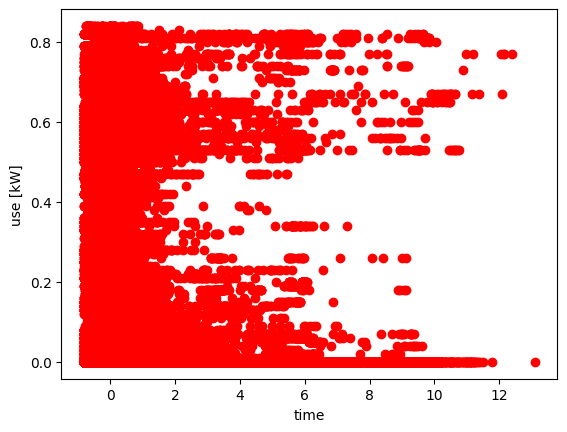

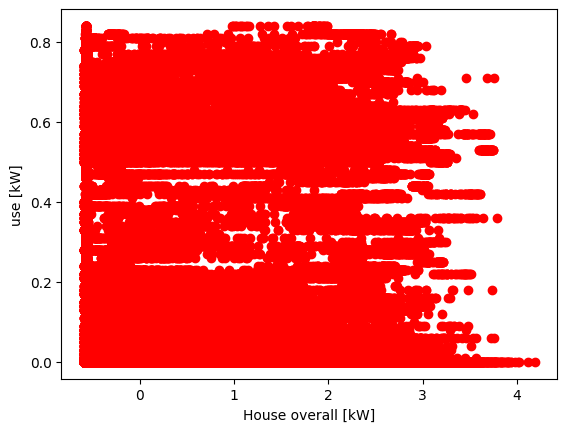

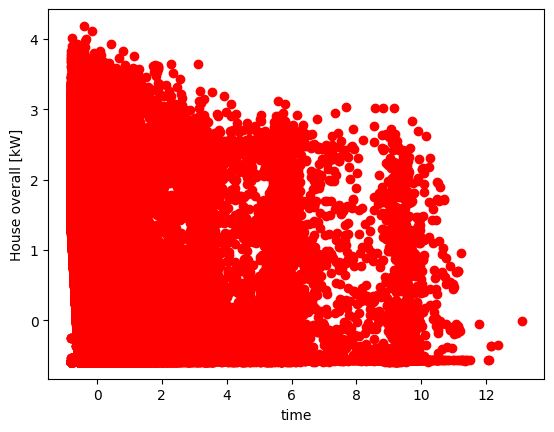

In [68]:
xlabel1 = "time"
xlabel2 = "House overall [kW]"
ylabel1 = "use [kW]"
graficarDatos(X_norm[:, 0], y, xlabel1, ylabel1)
graficarDatos(X_norm[:, 1], y, xlabel2, ylabel1)
graficarDatos(X_norm[:, 0], X_norm[:, 1], xlabel1, xlabel2)


In [69]:
# No olvidarse agregar unos a la matriz de x
#munos = np.ones([m, 1]).unsqueese
#print(munos.shape)
#X = np.stack([np.ones(m), X], axis=1)
#X = np.stack([X, munos], axis=1)
X_ready = np.concatenate([np.ones((m, 1)), X_norm], axis=1)
# X = np.insert(X, 0, 1, axis=1)
# X.shape

In [151]:
print (X_ready)

[[ 1.00000000e+00  6.98077594e-02 -5.66437211e-01 ...  7.47680815e-01
  -2.30800631e-01 -7.48851978e-01]
 [ 1.00000000e+00  7.12252537e-02 -5.66566981e-01 ...  7.47680815e-01
  -2.30800631e-01 -7.48851978e-01]
 [ 1.00000000e+00  6.88470138e-02 -5.66566981e-01 ...  7.47680815e-01
  -2.30800631e-01 -7.48851978e-01]
 ...
 [ 1.00000000e+00  1.05767534e+00 -5.68513605e-01 ... -1.53556170e-01
   6.66436155e-01 -3.88938127e-01]
 [ 1.00000000e+00  1.06972404e+00 -5.68383836e-01 ... -1.53556170e-01
   6.66436155e-01 -3.88938127e-01]
 [ 1.00000000e+00  0.00000000e+00  0.00000000e+00 ... -2.66819747e-16
   0.00000000e+00  0.00000000e+00]]


In [73]:
def calcularCosto(X, y, theta):
  m = y.size
  J = 0
  h = np.dot(X, theta)
  # print(h)
  J = (1/(2 * m)) * np.sum(np.square(np.dot(X, theta) - y))
  return J

In [74]:
# Ajustar las dimensiones de theta para que tenga el mismo número de columnas que X_ready
theta = np.array([0.1, 5.0, 0.1])
theta = np.resize(theta, (X_ready.shape[1],))

# Calcular el costo con las dimensiones corregidas
JJ = calcularCosto(X_ready, y, theta)
print(f"Con theta: {theta}, se obtiene un costo de: {JJ}")

Con theta: [0.1 5.  0.1 0.1 5.  0.1 0.1 5.  0.1 0.1 5.  0.1 0.1 5.  0.1 0.1 5.  0.1
 0.1 5.  0.1 0.1 5.  0.1 0.1 5.  0.1 0.1], se obtiene un costo de: 150.8449344963514


In [75]:
def calcularDescensoGradiente(X, y, theta, alpha, numero_iteraciones):
  m = y.shape[0]
  theta = theta.copy()
  J_historico = []

  for i in range(numero_iteraciones):
    theta = theta - (alpha / m) * (np.dot(X, theta) - y).dot(X)
    J_historico.append(calcularCosto(X, y, theta))

  return theta, J_historico

los valores de theta calculados son: [ 5.64505863e-02 -2.29550661e-03  1.07168721e-03 -2.29550661e-03
  1.41504050e-03  6.25694306e-04  1.99151188e-03 -6.36907389e-05
 -5.69673030e-04 -1.02013335e-03 -7.81866698e-05 -1.95735710e-03
  3.31718905e-04 -1.04960796e-04  1.24890405e-03  8.18342050e-04
 -5.23891526e-04  1.41774005e-05  1.07168721e-03  7.09821645e-04
  1.05915587e-02 -2.68930699e-02  1.00087436e-03 -1.19781040e-02
  5.65554577e-03 -8.47129856e-03  1.14717033e-01  3.09164658e-03]
con un costo de: 0.004404255923144416 


Text(0, 0.5, 'Costo J')

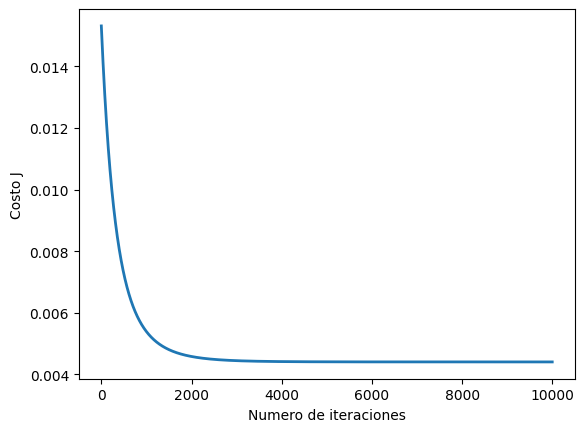

In [107]:
theta = np.zeros(X_ready.shape[1])

num_ite = 10000
alpha = 0.001

theta, J_historico = calcularDescensoGradiente(X_ready, y, theta, alpha, num_ite)
print(f"los valores de theta calculados son: { theta }")
print(f"con un costo de: { J_historico[-1]} ")

# Grafica la convergencia del costo
pyplot.plot(np.arange(len(J_historico)), J_historico, lw=2)
pyplot.xlabel('Numero de iteraciones')
pyplot.ylabel('Costo J')


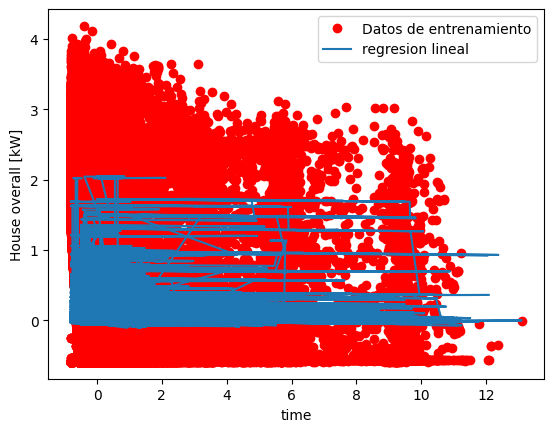

In [108]:
#graficarDatos(X[:, 1], y, xlabel1, ylabel1)
# graficarDatos(X[:, 2], y, xlabel2, ylabel1)
# Ajustar theta a un vector columna

graficarDatos(X_ready[:, 1], X_ready[:, 2], xlabel1, xlabel2)

pyplot.plot(X_ready[:, 1], np.dot(X_ready, theta), '-')

pyplot.legend(['Datos de entrenamiento', 'regresion lineal'])

In [117]:
# 2300,4,449900
# Definir theta con más de un elemento
theta = np.array([0.1, 0.2, 0.3])
y_pred = np.dot([1, 2305, 4], theta)
print(y_pred)

462.3


In [118]:
#Utilizando la ecuacion de la norma

In [152]:
# Leer datos
data = pd.read_csv('/content/drive/MyDrive/SIS420 1.2024/Laboratorios/lab1/HomeC.csv', delimiter=',')

# Selecciona las columnas específicas para X y y
columnas_X = ['time', 'gen [kW]', 'House overall [kW]', 'Dishwasher [kW]', 'Furnace 1 [kW]', 'Furnace 2 [kW]', 'Home office [kW]', 'Fridge [kW]', 'Wine cellar [kW]']
columna_y = 'use [kW]'

# Extrae las características (X) y la variable objetivo (y)
X = data[columnas_X].values
y = data[columna_y].values
m = len(y)
print(m)

X = np.concatenate([np.ones((m, 1)), X], axis=1)

<ipython-input-152-8ec7b35bd7b9>:2: DtypeWarning: Columns (0,27) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('/content/drive/MyDrive/SIS420 1.2024/Laboratorios/lab1/HomeC.csv', delimiter=',')


503911


In [167]:
def calcularThethaEcuacionNormal(X, y):
 #   theta = np.zeros(X.shape[1])
 #   theta = np.dot(np.dot(np.linalg.inv(np.dot(X.T,X)),X.T),y)
 #   return theta
 #def calcularThethaEcuacionNormal(X, y):
    X = np.array(X)  # Convertir X a una matriz NumPy
    y = np.array(y)
    #y = np.array(y, dtype=float)  # Convertir y a una matriz NumPy de tipo flotante
    theta = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)), X.T), y)
    return theta

In [132]:
#X_ren = np.concatenate([np.ones((m, 1)), X], axis=1)

In [168]:
#theta = calcularThethaEcuacionNormal(X_ren, y);
X_ren = np.array(X_ren)  # Convertir X_ren a una matriz NumPy
y = np.array(y)  # Convertir y a una matriz NumPy
theta = calcularThethaEcuacionNormal(X_ren, y)
print(f"Los valores de theta calculados son: {theta}")
#X_ren = np.array(X_ren)  # Convertir X_ren a una matriz NumPy
#y = np.array(y)  # Convertir y a una matriz NumPy
#theta = calcularThethaEcuacionNormal(X_ren, y)
#print(f"Los valores de theta calculados son: {theta}")

TypeError: can't multiply sequence by non-int of type 'float'

In [166]:
X_array = [1, 2305, 4]
price = np.dot(X_array, theta)

print('consumo de energia predecido para una casa (usando la ecuación de la normal): Kw {:.0f}'.format(price))

consumo de energia predecido para una casa (usando la ecuación de la normal): Kw 462
